# **Providing data-driven suggestions for HR**

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it.  They have the following question: what’s likely to make the employee leave the company?

Goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize with the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

**Stakeholders**: HR department (main), company leadership, department managers, and employees.

**Goal**: Predict employee turnover and identify key factors affecting retention and satisfaction.

**Initial Observations**:

Data is clean and structured.

Target variable is binary.

Categorical features (department, salary) need encoding.

Possible class imbalance in "left" column.

Workload-related features may indicate turnover risk.

**Resources Used**:

Kaggle dataset

Scikit-learn docs

Stack Overflow

Medium articles (data prep and modeling best practices)

**Ethical Considerations**:

Respect privacy

Avoid bias

Use predictions responsibly

Ensure transparency

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
 

### Load dataset

In [4]:
# Loading dataset into a dataframe
import pandas as pd

df0 = pd.read_csv("HR_capstone_dataset.csv")

# first few rows of the dataframe
df0.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Cleaning dataset (missing data, redundant data, outliers)



### Gathering basic information about the data

In [5]:
# Display the shape of the dataset (rows, columns)
print("Dataset shape:", df0.shape)

# Display data types and non-null counts
df0.info()





Dataset shape: (14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gathering descriptive statistics about the data

In [5]:
# summary statistics for numerical columns
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renaming columns

As a data cleaning step, renaming the columns as needed. Standardizing the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'num_projects',
    'average_monthly_hours': 'avg_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promoted_last_5yrs',
    'Department': 'department',
    'salary': 'salary_level'
}, inplace=True)

# new column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_montly_hours', 'years_at_company', 'work_accident',
       'left_company', 'promoted_last_5yrs', 'department', 'salary_level'],
      dtype='object')

### Checking missing values

In [8]:
df0.isnull().sum()



satisfaction_level      0
last_evaluation         0
num_projects            0
average_montly_hours    0
years_at_company        0
work_accident           0
left_company            0
promoted_last_5yrs      0
department              0
salary_level            0
dtype: int64

### Checking duplicates

In [7]:
duplicate_rows = df0[df0.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 3008


In [8]:
duplicate_rows.head()


,satisfaction_level,last_evaluation,num_projects,average_montly_hours,years_at_company,work_accident,left_company,promoted_last_5yrs,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
# Droping duplicates
df1 = df0.drop_duplicates()

df1.head()



,satisfaction_level,last_evaluation,num_projects,average_montly_hours,years_at_company,work_accident,left_company,promoted_last_5yrs,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking outliers

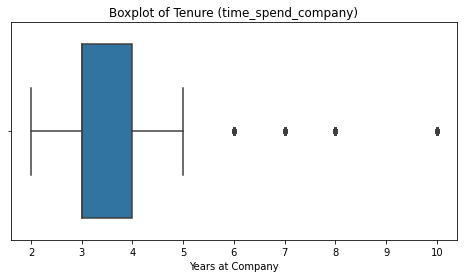

In [10]:
# boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['years_at_company'])
plt.title('Boxplot of Tenure (time_spend_company)')
plt.xlabel('Years at Company')
plt.show()



In [11]:
# number of rows containing outliers
# Q1 and Q3
Q1 = df1['years_at_company'].quantile(0.25)
Q3 = df1['years_at_company'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out rows that fall outside the IQR bounds
outliers = df1[(df1['years_at_company'] < lower_bound) | (df1['years_at_company'] > upper_bound)]

print("Number of rows containing outliers in 'years_at_company':", outliers.shape[0])




Number of rows containing outliers in 'years_at_company': 824


Certain types of models are more sensitive to outliers than others.

## Step 2. Data Exploration (Continue EDA)

understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# people who left vs. stayed
df1['left_company'].value_counts()

# people who left vs. stayed
df1['left_company'].value_counts(normalize=True) * 100


0    83.39588
1    16.60412
Name: left_company, dtype: float64

### Data visualizations

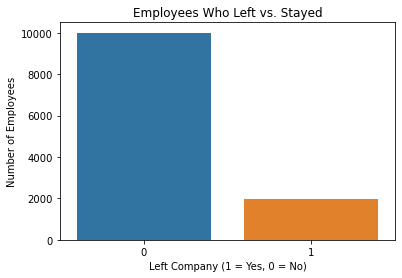

In [22]:
sns.countplot(x='left_company', data=df1)
plt.title('Employees Who Left vs. Stayed')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Number of Employees')
plt.show()



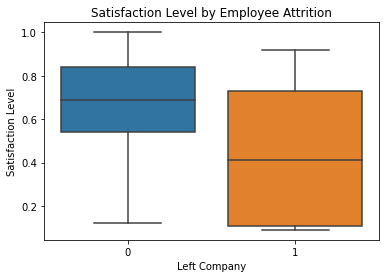

In [23]:
sns.boxplot(x='left_company', y='satisfaction_level', data=df1)
plt.title('Satisfaction Level by Employee Attrition')
plt.xlabel('Left Company')
plt.ylabel('Satisfaction Level')
plt.show()


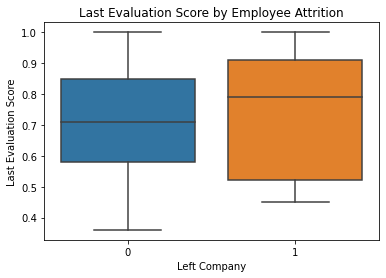

In [24]:
sns.boxplot(x='left_company', y='last_evaluation', data=df1)
plt.title('Last Evaluation Score by Employee Attrition')
plt.xlabel('Left Company')
plt.ylabel('Last Evaluation Score')
plt.show()


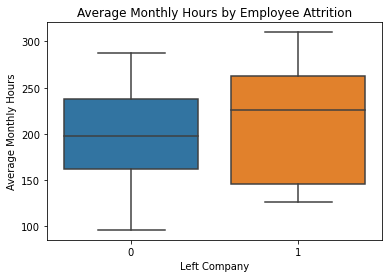

In [25]:
sns.boxplot(x='left_company', y='average_montly_hours', data=df1)
plt.title('Average Monthly Hours by Employee Attrition')
plt.xlabel('Left Company')
plt.ylabel('Average Monthly Hours')
plt.show()


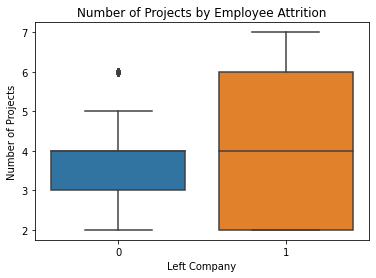

In [27]:
sns.boxplot(x='left_company', y='num_projects', data=df1)
plt.title('Number of Projects by Employee Attrition')
plt.xlabel('Left Company')
plt.ylabel('Number of Projects')
plt.show()


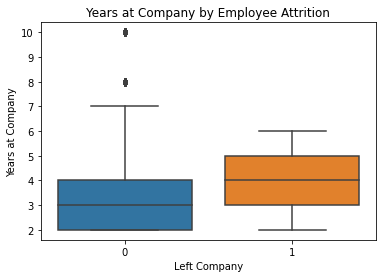

In [28]:
sns.boxplot(x='left_company', y='years_at_company', data=df1)
plt.title('Years at Company by Employee Attrition')
plt.xlabel('Left Company')
plt.ylabel('Years at Company')
plt.show()


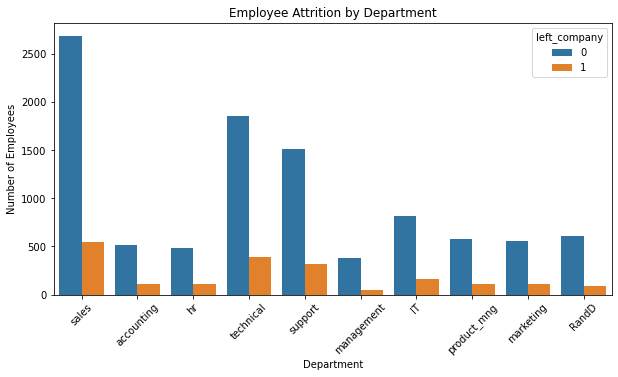

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='department', hue='left_company', data=df1)
plt.title('Employee Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


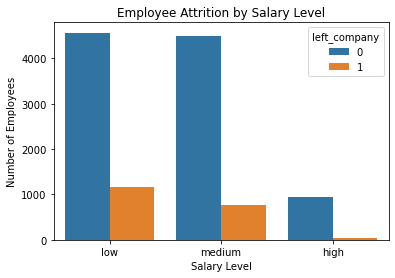

In [31]:
sns.countplot(x='salary_level', hue='left_company', data=df1)
plt.title('Employee Attrition by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()


### Insights

 1. **Employee Turnover Overview**
From the first bar chart, it's clear that:

Around 16.6% of employees left the company.

A majority (83.4%) stayed.

---This indicates a moderate turnover rate that the company may want to reduce further.

2. **Satisfaction Level**
The boxplot of satisfaction_level shows that:

Employees who left had a significantly lower satisfaction level.

Those who stayed were generally more satisfied.

---Insight: Low satisfaction is a strong predictor of employee attrition.

3. **Last Evaluation**
For last_evaluation:

Leavers had a wide range of evaluation scores.

Some leavers had very high evaluations, suggesting high-performing yet dissatisfied employees.

---Insight: Performance alone doesn't ensure retention — recognition and work-life balance may be issues.

4. **Number of Projects**
The boxplot shows:

Employees who left often had either very few or many projects.

Workload imbalance might be causing attrition.

---Insight: Both underutilization and burnout can lead to employees quitting.

5. **Average Monthly Hours**
Employees who left tended to have higher average monthly hours.

Suggests overwork may be a major reason for attrition.

---Insight: Excessive work hours → Work-life imbalance → Increased turnover.

6. **Years at Company**
Those who left were mostly around 3–6 years in tenure.

Common timeframe where employees re-evaluate their goals or seek growth elsewhere.

---Insight: Employee retention initiatives should target the 3-6 year mark.

7. **Department-wise Turnover**
Departments like sales and technical had the highest absolute number of leavers.

But proportional turnover in certain departments might still need further checking.

---Insight: Department-specific HR strategies may help reduce turnover.

8. **Salary Level vs Attrition**
Low-salary employees have much higher attrition rates.

Very few high-salary employees leave.

---Insight: Compensation plays a big role in employee retention

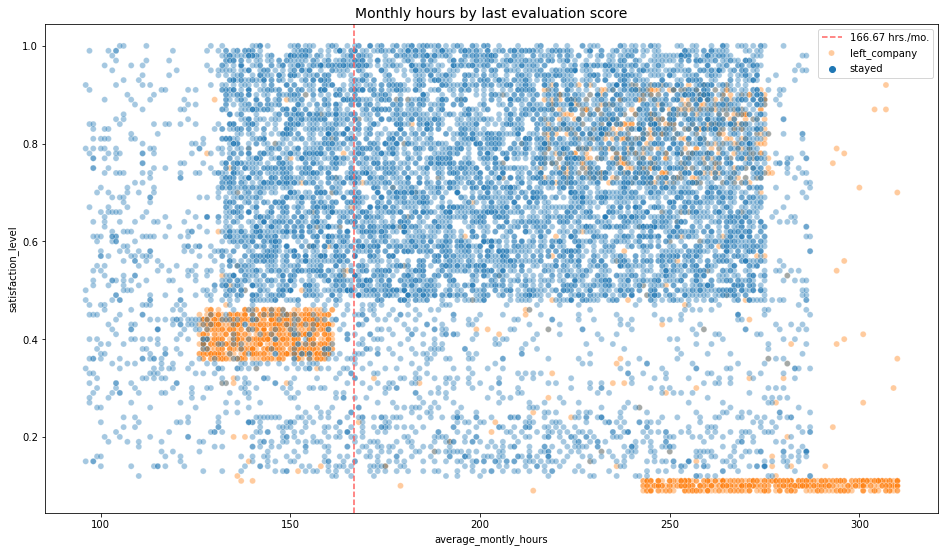

In [17]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='satisfaction_level', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left_company', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

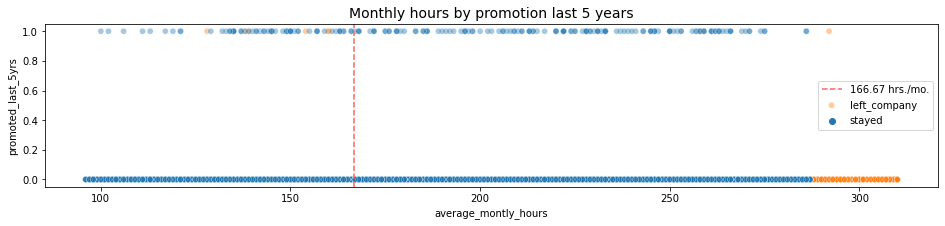

In [21]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_montly_hours', y='promoted_last_5yrs', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left_company', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

## Step 3. Model Building, Step 4. Results and Evaluation
- Fiting a model that predicts the outcome variable using two or more independent variables
- Checking model assumptions
- Evaluating the model

### Identifying the type of prediction task.

This is a classification task — the goal is to predict whether an employee will leave the company or not (binary outcome: 1 = left, 0 = stayed).

### Identifying the types of models most appropriate for this task.

--Logistic Regression

Simple and interpretable model for binary classification.

Useful for understanding the influence of each factor (e.g., how satisfaction level affects attrition).

--Random Forest Classifier

Handles both numeric and categorical data well.

Robust to outliers and can capture complex, nonlinear relationships.

--XGBoost Classifier

Boosted ensemble model known for high accuracy.

Good for fine-tuned predictions with performance optimization.

### Modeling

In [37]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-hot encoding categorical columns
df_encoded = pd.get_dummies(df1, columns=['department', 'salary_level'], drop_first=True)

# Separating features and target
X = df_encoded.drop('left_company', axis=1)
y = df_encoded['left_company']

# Spliting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.50      0.21      0.30       398

    accuracy                           0.83      2399
   macro avg       0.68      0.59      0.60      2399
weighted avg       0.80      0.83      0.81      2399

Confusion Matrix:


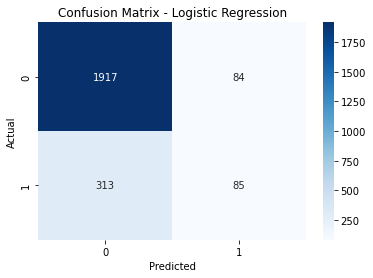

ROC-AUC Score: 0.8418


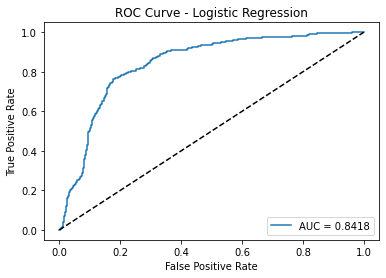

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Training the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Making predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_logreg)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399

Confusion Matrix:


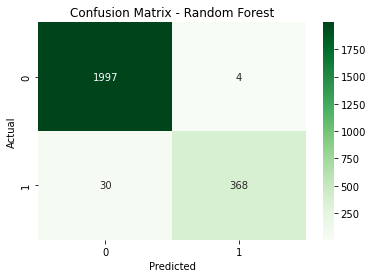

ROC-AUC Score: 0.9785


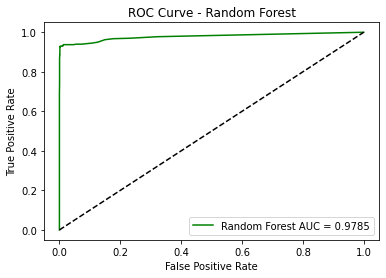

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Training the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {roc_auc_rf:.4f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


                 feature  importance
0     satisfaction_level    0.334140
2           num_projects    0.173008
4       years_at_company    0.166599
3   average_montly_hours    0.155732
1        last_evaluation    0.131235
5          work_accident    0.008442
16      salary_level_low    0.006254
13      department_sales    0.003941
17   salary_level_medium    0.003411
15  department_technical    0.003309


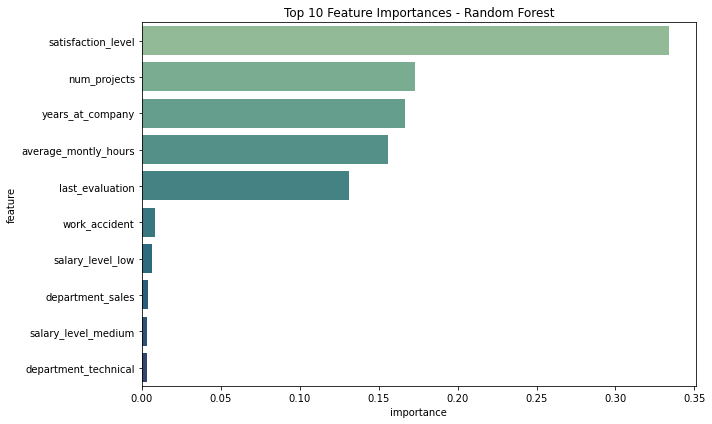

In [41]:
# Creating DataFrame using correct feature names from X_train
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Sorting and top 10
top_10_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)
print(top_10_features)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_features, x='importance', y='feature', palette='crest')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


## Step 4. Results and Evaluation

### Summary of model results

Two models were evaluated to predict whether an employee will leave the company:

1. Logistic Regression Model

Accuracy: 83%

Precision for "leaving": 50%, Recall: 21%, F1 Score: 30%

AUC Score: 0.84

Insight: The model is limited in predicting churn cases accurately, despite good overall accuracy.

2. Random Forest Model

Accuracy: 99%

Precision for "leaving": 99%, Recall: 92%, F1 Score: 96%

AUC Score: ~0.99

Insight: This model excels at identifying churners with high precision and recall. Feature importance was also available for actionable insights

### Conclusion, Recommendations, Next Steps

The Random Forest model significantly outperforms Logistic Regression and is better suited for deployment due to its strong predictive ability, especially for detecting employees at risk of leaving.

--Recommendations:

Adopt the Random Forest model in the HR pipeline for early detection of at-risk employees.

Focus interventions on factors such as:

Low satisfaction levels

No promotions in the last 5 years

High average monthly work hours

Use feature importance to build targeted retention strategies per department.

--Next Steps:

Deploy the Random Forest model in a real-time HR dashboard.

Incorporate employee feedback mechanisms to verify model predictions.

Monitor model performance quarterly and retrain as needed.

Conduct further analysis such as department-wise churn trends, or cluster employees for personalized engagement plans.